## 1. Define the Problem (Business Understanding)

*Goal*  : Predict medical charges based on patient and demographic features.

*Type of ML task*: Regression

*Target variable*: charges

*Input features*: age, sex, bmi, children, smoker, region

# ⚙️ 1. Data Understanding 

## 1.1- Load the Dataset

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/insurance.csv")
print("✅ Dataset Loaded Successfully")

✅ Dataset Loaded Successfully


## 1.2- Random Sample Data

In [6]:
# ==========================================
# 3. Random Sample of Data
# ==========================================
print("\n🔹 Random Sample of Dataset:")
display(df.sample(5))


🔹 Random Sample of Dataset:


age     sex     bmi  children smoker     region      charges
237    31    male  38.390         2     no  southeast   4463.20510
1277   32  female  29.735         0     no  northwest   4357.04365
125    26  female  28.785         0     no  northeast   3385.39915
1282   18  female  21.660         0    yes  northeast  14283.45940
839    59  female  31.350         0     no  northwest  12622.17950

## 1.3- Size of Data

In [7]:
# ==========================================
# 4. Dataset Size
# ==========================================
rows, cols = df.shape
print(f"\n🔹 Dataset Size: {rows} rows, {cols} columns")


🔹 Dataset Size: 1338 rows, 7 columns


## 1.4-Information of the data 

In [8]:
# ==========================================
# 5. Dataset Information
# ==========================================
print("\n🔹 Dataset Information:")
df.info()


🔹 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1.5- Check Names of Columns 

In [9]:
# ==========================================
# 6. Column Names
# ==========================================
print("\n🔹 Column Names:")
print(list(df.columns))


🔹 Column Names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


## 1.6- Checks Description

In [10]:
# ==========================================
# 7. Statistical Description
# ==========================================
print("\n🔹 Statistical Summary:")
display(df.describe())


🔹 Statistical Summary:


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## 1.7- Number Of Unique Columns 

In [11]:
# ==========================================
# 8. Number of Unique Values per Column
# ==========================================
print("\n🔹 Unique Values per Column:")
display(df.nunique())


🔹 Unique Values per Column:


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 1.8- Check Balance Of Data

In [12]:
# ==========================================
# Data Balance Check – Categorical Features
# ==========================================

categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\n🔹 Distribution of {col}:")
    display(df[col].value_counts())
    print("Percentage Distribution:")
    display(df[col].value_counts(normalize=True) * 100)


🔹 Distribution of sex:


sex
male      676
female    662
Name: count, dtype: int64

Percentage Distribution:


sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64


🔹 Distribution of smoker:


smoker
no     1064
yes     274
Name: count, dtype: int64

Percentage Distribution:


smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


🔹 Distribution of region:


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Percentage Distribution:


region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: proportion, dtype: float64

# ✨ 2. Data Cleaning 

## 2.1- Check For missing vaLues and impute  
### 🔹 Step 1: Check Missing Values

In [13]:
# ==========================================
# Missing Values Check
# ==========================================
missing_values = df.isnull().sum()

print("🔹 Missing Values per Column:")
display(missing_values)

🔹 Missing Values per Column:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 🔹 Step 2: Imputation Strategy (Professional Practice)

In [14]:
# ==========================================
# Imputation Strategy (If Needed)
# ==========================================

# Numerical → Median (robust to outliers)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Categorical → Mode
# ==========================================
# Safe Categorical Imputation (No Warning)
# ==========================================

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


## 2.2- Delect and Drop duplicate rows 

### 🔹 Check for Duplicates

In [15]:
# ==========================================
# Duplicate Rows Detection
# ==========================================
duplicate_count = df.duplicated().sum()
print(f"🔹 Number of Duplicate Rows: {duplicate_count}")

🔹 Number of Duplicate Rows: 1


### 🔹 Remove Duplicates (If Any)

In [16]:
# ==========================================
# Remove Duplicate Rows
# ==========================================
df.drop_duplicates(inplace=True)
print("✅ Duplicate rows removed (if existed)")

✅ Duplicate rows removed (if existed)


## 2.3 outlier delection

### 🔹 Method Used: IQR (Interquartile Range)

In [17]:
# ==========================================
# Outlier Detection using IQR
# ==========================================

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'age': 0, 'bmi': 9, 'children': 0, 'charges': 139}

# 📊 3. EDA (Exploratory Data Analysis)

### 3.1- Univariate Analysis

### 🔹Distribution of numerical Features 

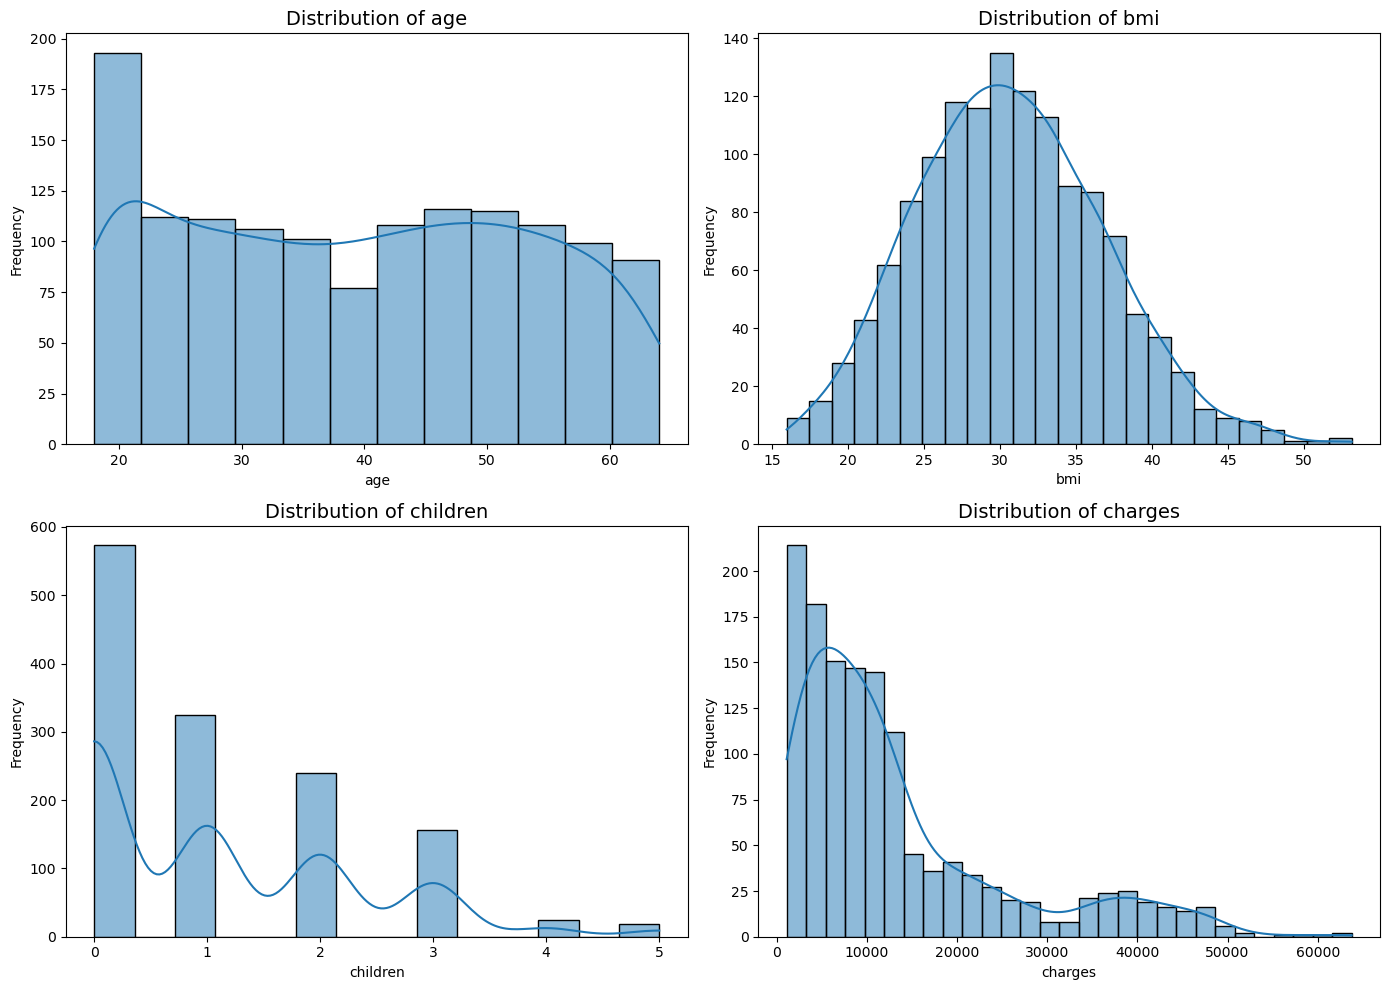

In [18]:
# ==========================================
# Distribution of Numerical Features (Seaborn)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(
        data=df,
        x=feature,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### 🔹Boxplots for numeical features 

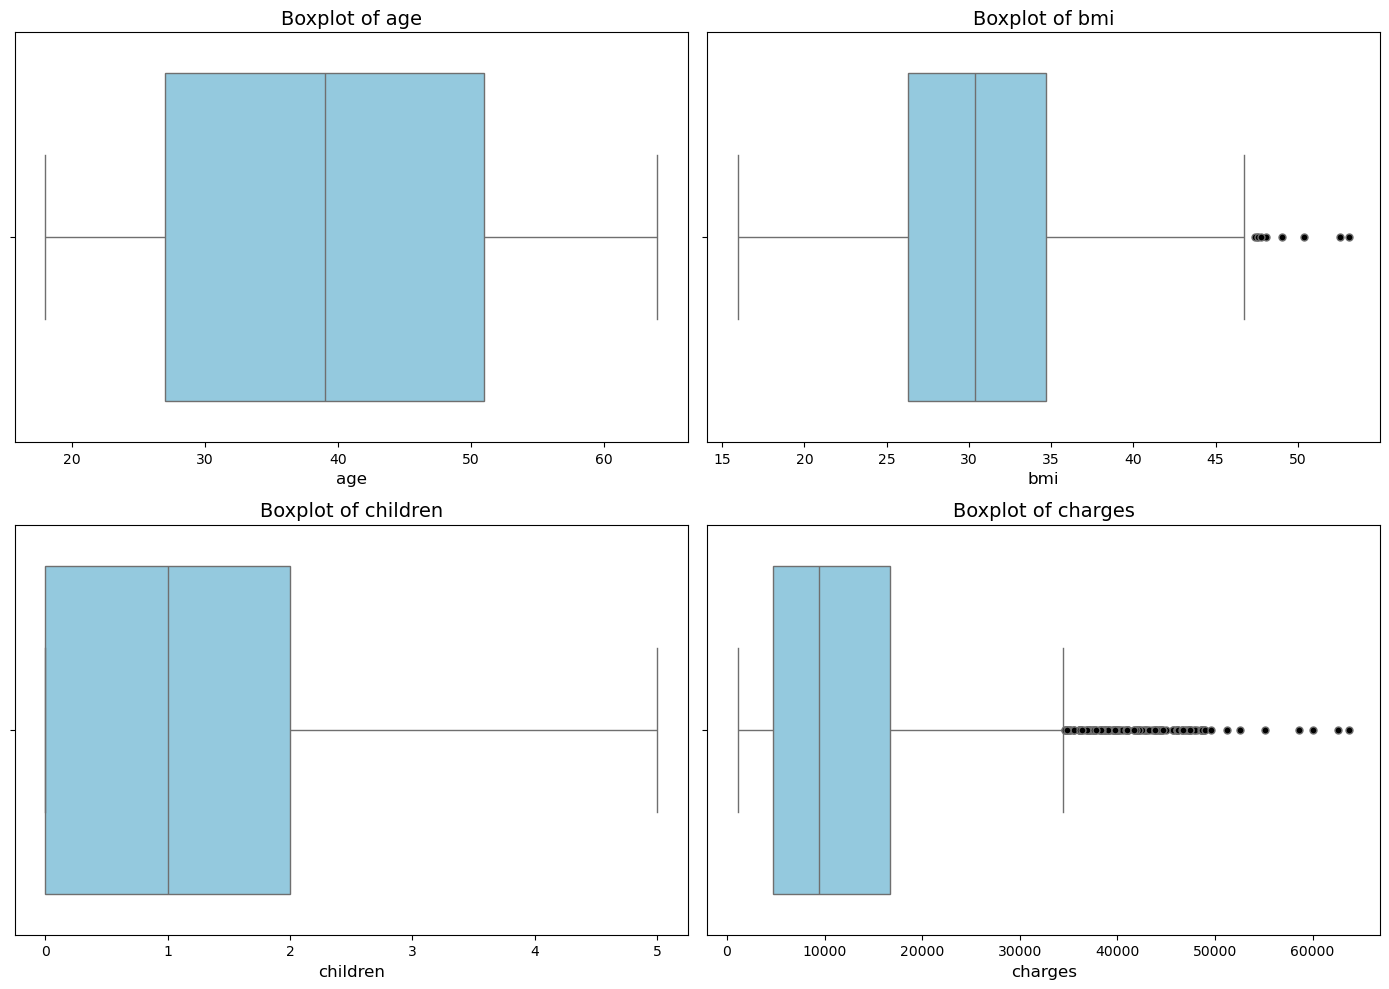

In [19]:
# ==========================================
# Boxplots for Numerical Features
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(
        x=df[feature],
        ax=axes[i],
        color='skyblue',
        flierprops=dict(marker='o', markerfacecolor='black', markersize=5)
    )
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()


### 🔹Count plots for categorical features 

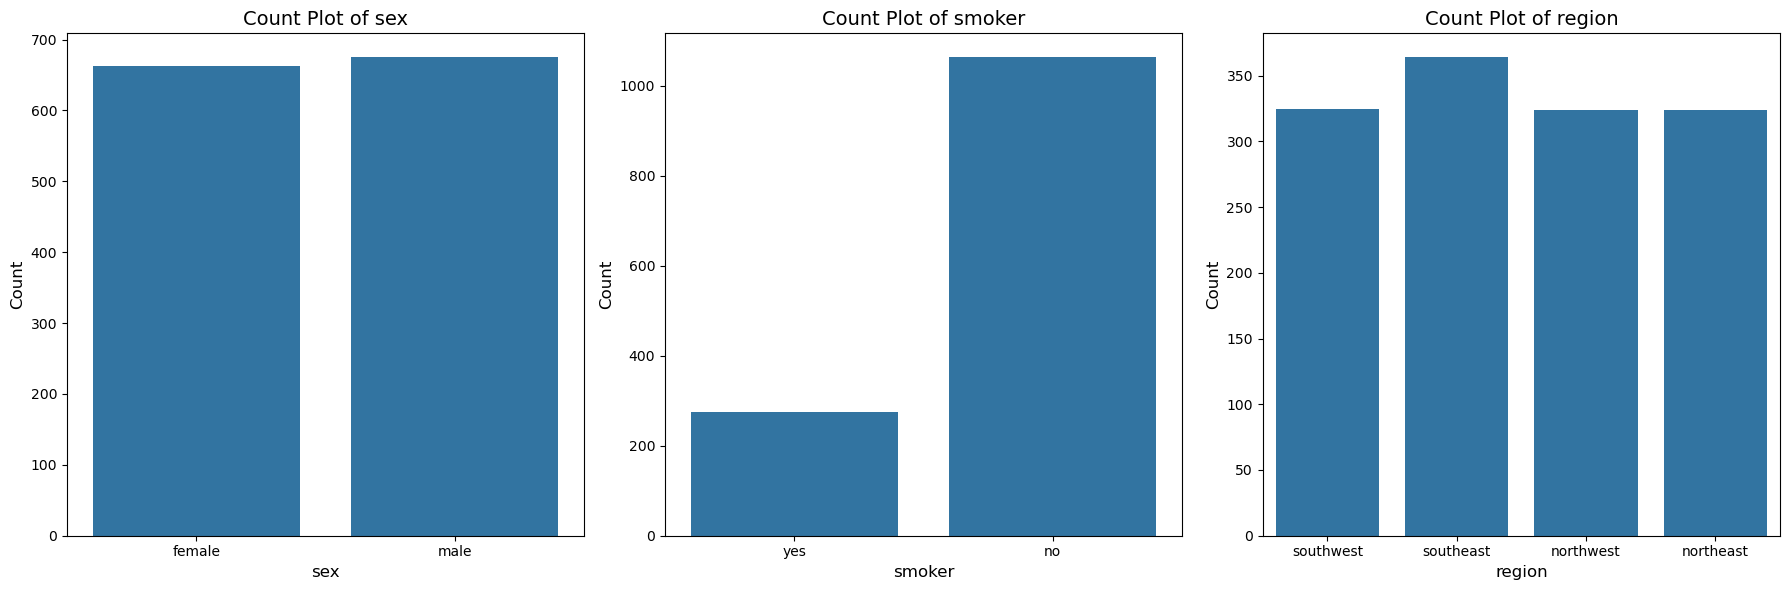

In [20]:
# ==========================================
# Count Plots for Categorical Features
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(categorical_features):
    sns.countplot(
        data=df,
        x=feature,
        ax=axes[i]
    )
    axes[i].set_title(f'Count Plot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### 🔹Check Skewness and Kurto

In [21]:
# ==========================================
# Skewness & Kurtosis
# ==========================================

skew_kurt_table = pd.DataFrame({
    "Feature": numerical_cols,
    "Skewness": df[numerical_cols].skew().values,
    "Kurtosis": df[numerical_cols].kurt().values
})

skew_kurt_table

Feature  Skewness  Kurtosis
0       age  0.054781 -1.244406
1       bmi  0.283914 -0.052947
2  children  0.937421  0.200954
3   charges  1.515391  1.604221

### 🔹Apply log/squrt transformation

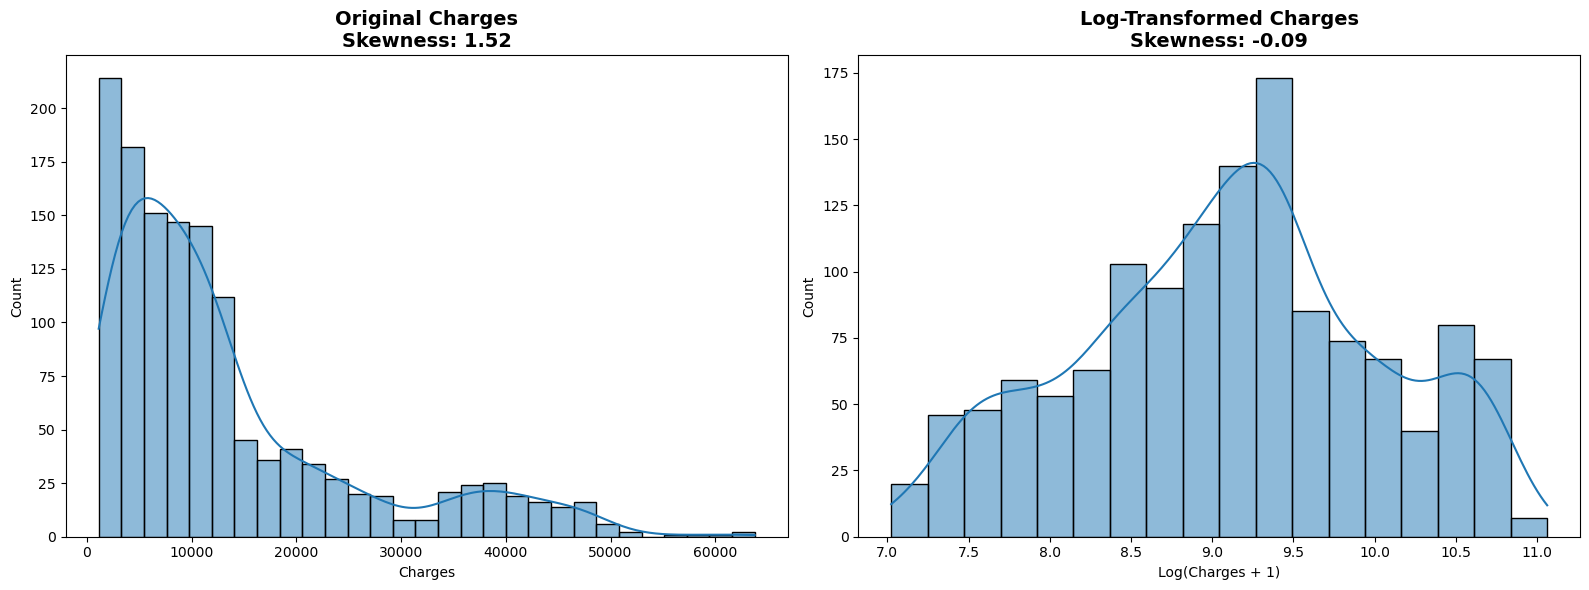

In [22]:
# ==========================================
# Log Transformation Effect on Charges
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
df['charges_log'] = np.log1p(df['charges'])  # log(1 + x) → numerically stable

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original distribution
sns.histplot(
    df['charges'],
    kde=True,
    ax=axes[0]
)
axes[0].set_title(
    f'Original Charges\nSkewness: {df["charges"].skew():.2f}',
    fontsize=14,
    fontweight='bold'
)
axes[0].set_xlabel('Charges')

# Log-transformed distribution
sns.histplot(
    df['charges_log'],
    kde=True,
    ax=axes[1]
)
axes[1].set_title(
    f'Log-Transformed Charges\nSkewness: {df["charges_log"].skew():.2f}',
    fontsize=14,
    fontweight='bold'
)
axes[1].set_xlabel('Log(Charges + 1)')

plt.tight_layout()
plt.show()

### 3.2- Bivariate Analysis 

### -Correlation Matrix + Heatmap (Numerical Features)

### 🔹Correlation matrix 

In [23]:
# ==========================================
# Correlation Matrix
# ==========================================

numerical_features = ['age', 'bmi', 'children', 'charges']

corr_matrix = df[numerical_features].corr()
corr_matrix

age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000

### 🔹Heaptmap of Correlations

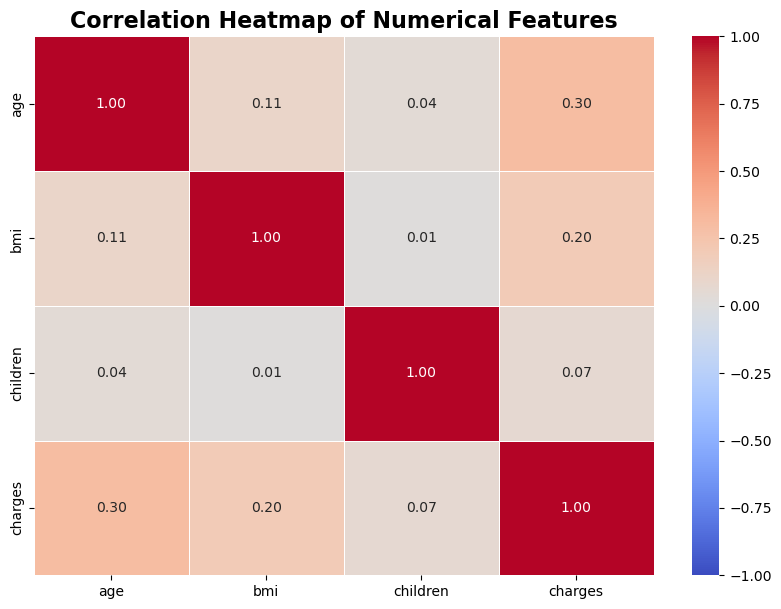

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'bmi', 'children', 'charges']

# Correlation matrix
corr_matrix = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix, 
    annot=True, fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')
plt.show()


### 🔹Scatter Plots (numerical Vs. numerical)
#### -Scatter Plots With Trendline & Hue (Numerical vs Target)

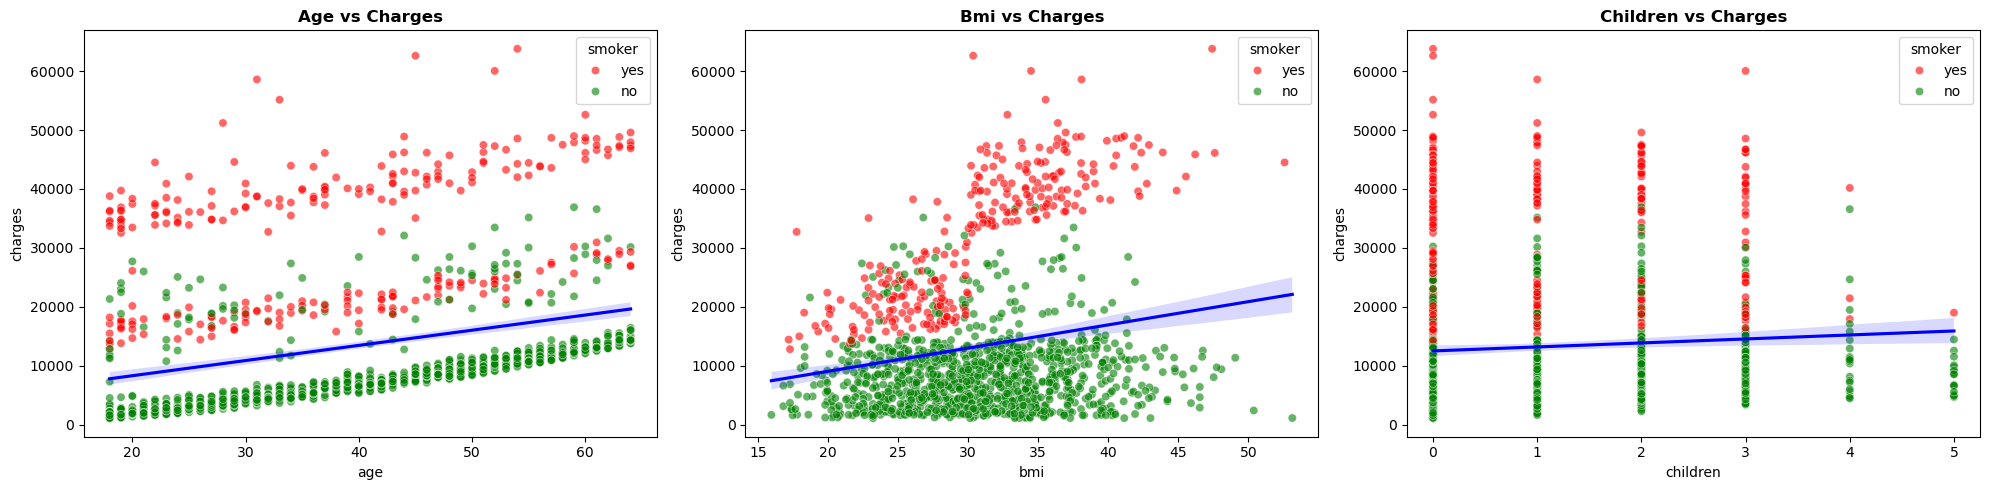

In [25]:
features = ['age', 'bmi', 'children']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, feature in enumerate(features):
    sns.scatterplot(
        data=df, 
        x=feature, 
        y='charges', 
        hue='smoker',  # 🔥 adds categorical effect
        palette={'yes':'red','no':'green'},
        alpha=0.6, ax=axes[i]
    )
    sns.regplot(
        data=df, x=feature, y='charges', scatter=False, ax=axes[i], color='blue'
    )
    axes[i].set_title(f'{feature.capitalize()} vs Charges', fontweight='bold')

plt.tight_layout()
plt.show()


### 🔹Barplot (categorical vs. numerical)
#### -Boxplots With Categorical & Target

C:\Users\MENNA\AppData\Local\Temp\ipykernel_5968\2526576903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


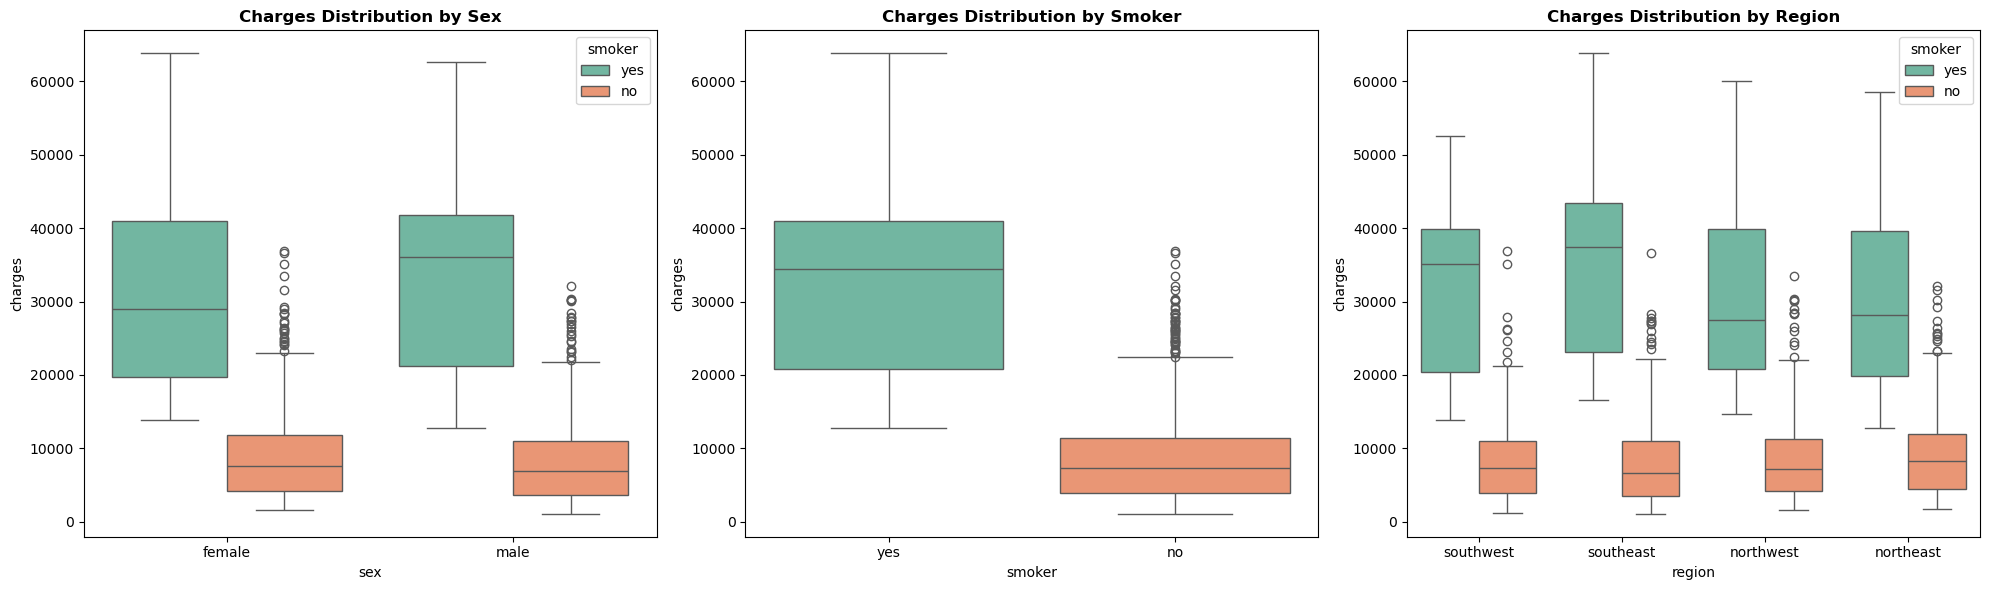

In [26]:
categorical_features = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, feature in enumerate(categorical_features):
    sns.boxplot(
        data=df, 
        x=feature, 
        y='charges', 
        hue='smoker' if feature != 'smoker' else None, # add hue except for smoker itself
        palette='Set2', ax=axes[i]
    )
    axes[i].set_title(f'Charges Distribution by {feature.capitalize()}', fontweight='bold')

plt.tight_layout()
plt.show()

### 🔹GroupBy aggregations 

In [27]:
# Aggregation for multiple categorical features
agg_summary = df.groupby(['sex', 'smoker', 'region'])['charges'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).sort_values(by='mean', ascending=False)

agg_summary.head(10)  # top 10 for clarity


count          mean        median          min  \
sex    smoker region                                                      
male   yes    southeast     55  36029.839367  38282.749500  17043.34140   
female yes    southeast     36  33034.820716  35017.722850  16577.77950   
male   yes    southwest     37  32598.862854  35585.576000  15820.69900   
female yes    southwest     21  31687.988430  34166.273000  13844.50600   
male   yes    northeast     38  30926.252583  33993.370025  12829.45510   
              northwest     29  30713.181419  26109.329050  15817.98570   
female yes    northwest     29  29670.824946  28950.469200  14711.74380   
              northeast     29  28032.046398  22331.566800  14283.45940   
       no     northeast    132   9640.426984   8681.137100   2196.47320   
              northwest    135   8786.998679   7731.857850   2117.33885   

                                 max  
sex    smoker region                  
male   yes    southeast  62592.87309  
female yes    southeast  63770.42801  
male   yes    southwest  52590.82939  
female yes    southwest  48824.45000  
male   yes    northeast  48549.17835  
              northwest  60021.39897  
female yes    northwest  55135.40209  
              northeast  58571.07448  
       no     northeast  31620.00106  
              northwest  33471.97189

#### -Advanced: Log-transformed Target Analysis

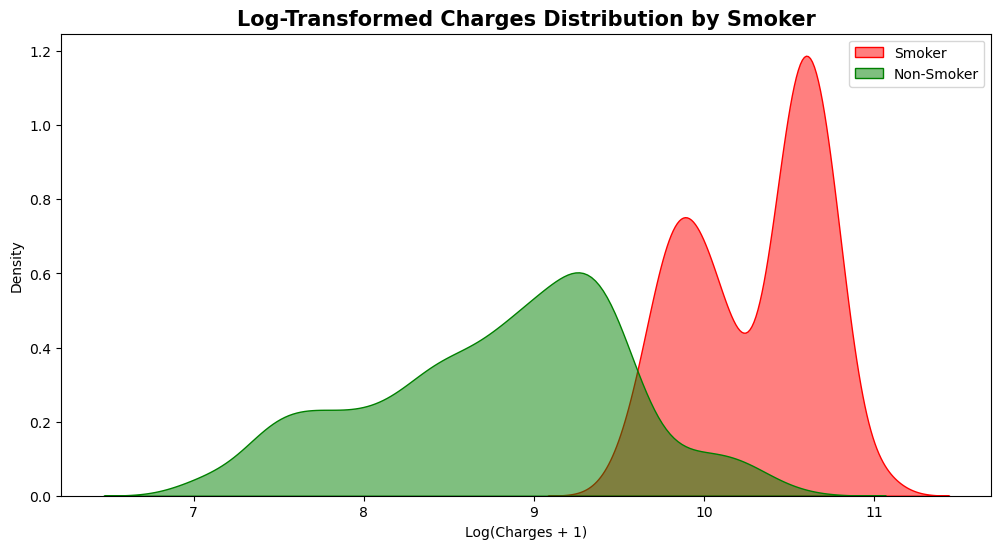

In [100]:
import numpy as np

# Compare log vs original by smoker
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['smoker']=='yes']['charges_log'], label='Smoker', fill=True, color='red', alpha=0.5)
sns.kdeplot(df[df['smoker']=='no']['charges_log'], label='Non-Smoker', fill=True, color='green', alpha=0.5)
plt.title("Log-Transformed Charges Distribution by Smoker", fontsize=15, fontweight='bold')
plt.xlabel("Log(Charges + 1)")
plt.ylabel("Density")
plt.legend()
plt.show()


#### -Correlation + Feature Importance Table

In [29]:
# Correlation with target
corr_target = df[numerical_features].corr()['charges'].sort_values(ascending=False)
corr_target_table = pd.DataFrame(corr_target).reset_index()
corr_target_table.columns = ['Feature', 'Correlation_with_Charges']
corr_target_table


Feature  Correlation_with_Charges
0   charges                  1.000000
1       age                  0.298308
2       bmi                  0.198401
3  children                  0.067389

### 3.3- Multivariate Analysis

### 🔹Pairplot (multiple numerical features)

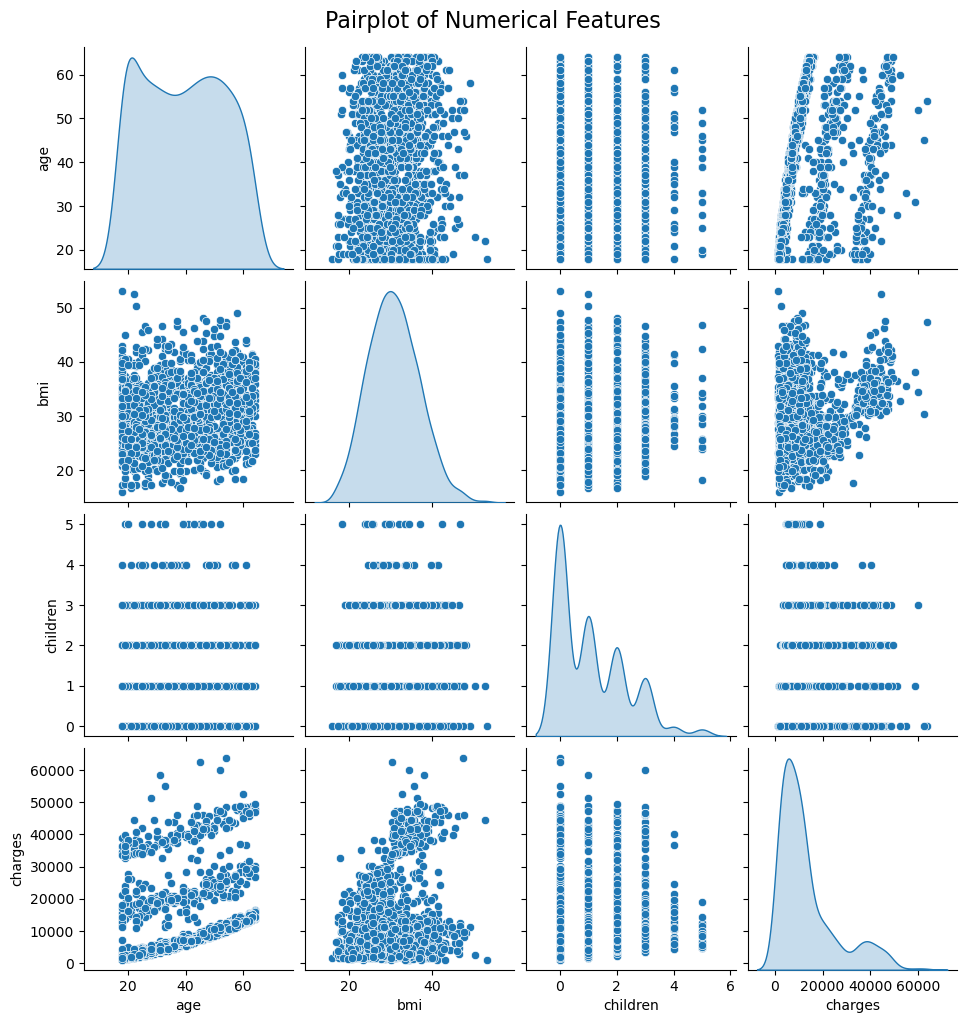

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ["age", "bmi", "children", "charges"]

sns.pairplot(df[numeric_features], diag_kind='kde')  # or diag_kind='hist'
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)

plt.show()

### 🔹3D Scatter plot 

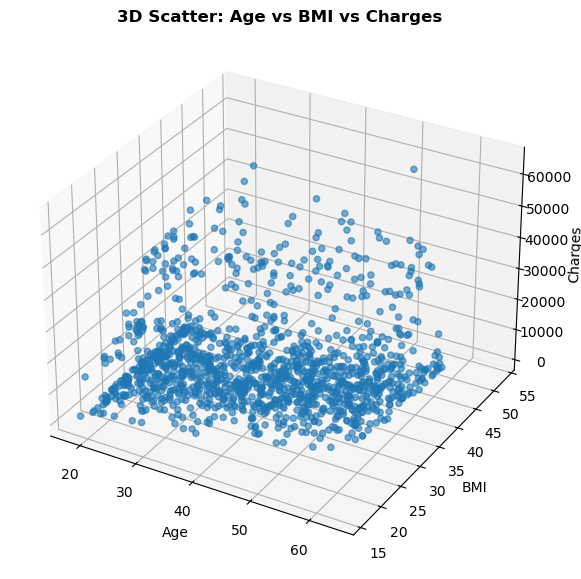

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['age'],
    df['bmi'],
    df['charges'],
    alpha=0.6
)

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title("3D Scatter: Age vs BMI vs Charges", fontweight='bold')

plt.show()

### 🔹Cluster analysis 

### 🔹PCA (principal Component Analysis) 

Explained Variance Ratio:
PC1: 0.37
PC2: 0.33
Total: 0.70


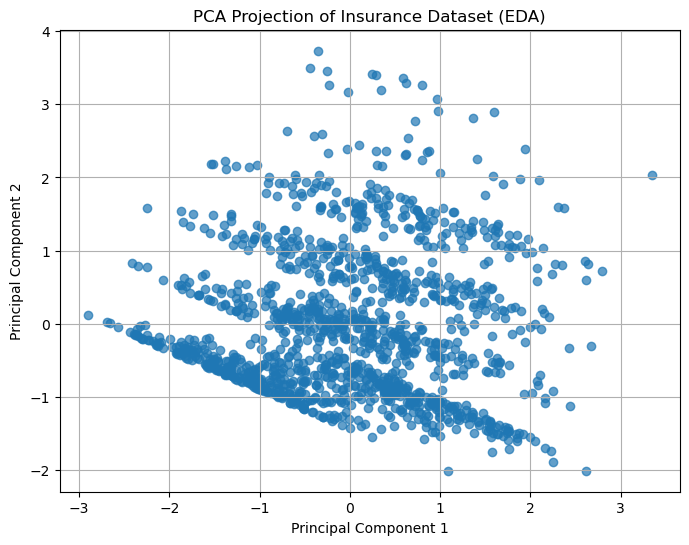

In [32]:
# ================================
# PCA - Exploratory Data Analysis
# ================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1️⃣ Select numerical features (EXCLUDE target)
pca_features = ['age', 'bmi', 'children']
X_pca_input = df[pca_features]

# 2️⃣ Scale features (MANDATORY for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# 3️⃣ Apply PCA (2 components for visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4️⃣ Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 5️⃣ Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio:")
print(f"PC1: {explained_variance[0]:.2f}")
print(f"PC2: {explained_variance[1]:.2f}")
print(f"Total: {explained_variance.sum():.2f}")

# 6️⃣ PCA Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Insurance Dataset (EDA)')
plt.grid(True)
plt.show()


### 🔹Check Multicollinearity (VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[numerical_features]
X_vif['Intercept'] = 1

vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i)
            for i in range(X_vif.shape[1])]
})

vif_data


C:\Users\MENNA\AppData\Local\Temp\ipykernel_5968\1487326587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_vif['Intercept'] = 1


Feature        VIF
0        age   1.101406
1        bmi   1.043981
2   children   1.005075
3    charges   1.135957
4  Intercept  32.317803

# 📈 4. Outliers Analysis & Data Quality Checks

### 4.1- Detect Outliers (Z-Score Method)/(IQR Method)

In [34]:
from scipy.stats import zscore
import numpy as np

# Select numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']

# Compute Z-scores
z_scores = np.abs(zscore(df[numerical_features]))

# Threshold
z_threshold = 3

# Identify outliers
outliers_z = (z_scores > z_threshold).any(axis=1)

print(f"🔹 Number of outliers detected using Z-score: {outliers_z.sum()}")

#=================================================

outliers_iqr = pd.Series(False, index=df.index)

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr |= (df[col] < lower_bound) | (df[col] > upper_bound)
 
print(f"🔹 Number of outliers detected using IQR: {outliers_iqr.sum()}")

🔹 Number of outliers detected using Z-score: 29
🔹 Number of outliers detected using IQR: 145


### 4.2- Outlier Handling (Regression-Safe)

In [35]:
df_clean = df.copy()

for col in numerical_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

### 4.3- Visual Check After Cleaning (Boxplots)

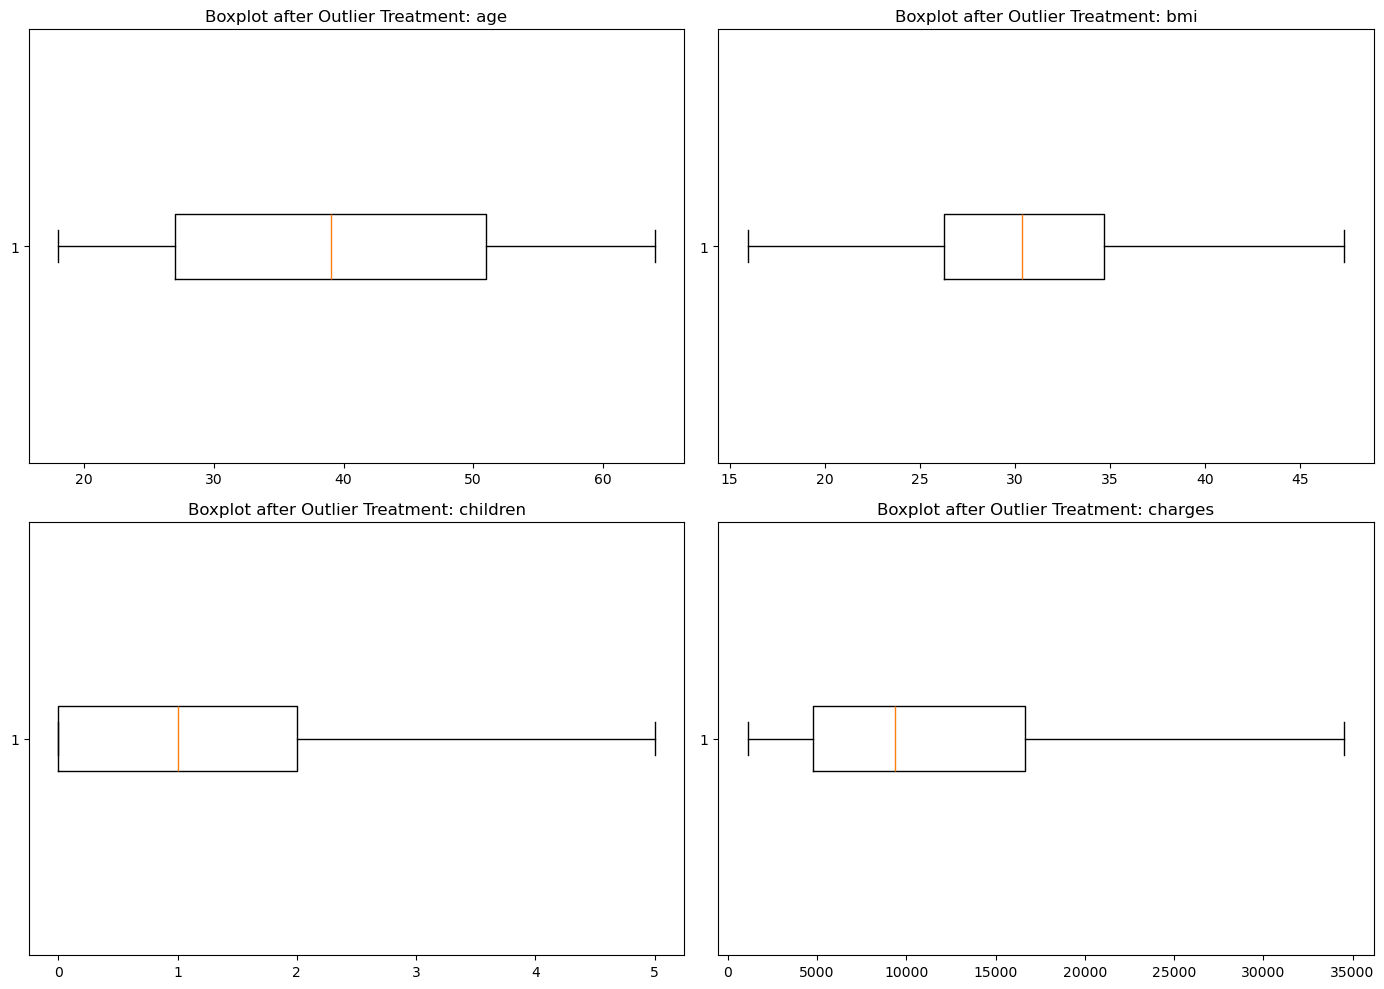

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(numerical_features):
    axes[i//2, i%2].boxplot(df_clean[col], vert=False)
    axes[i//2, i%2].set_title(f'Boxplot after Outlier Treatment: {col}')

plt.tight_layout()
plt.show()

### 4.4- Logical Validity Checks

In [37]:
print("Invalid age values:", (df_clean['age'] < 0).sum())
print("Invalid BMI values:", (df_clean['bmi'] <= 0).sum())
print("Invalid children values:", (df_clean['children'] < 0).sum())
print("Invalid charges values:", (df_clean['charges'] <= 0).sum())

Invalid age values: 0
Invalid BMI values: 0
Invalid children values: 0
Invalid charges values: 0


### -Optional: Flag rare categories (<5%)

In [38]:
threshold = 0.05

for col in categorical_features:
    rare_categories = df_clean[col].value_counts(normalize=True)
    rare_categories = rare_categories[rare_categories < threshold]

    if not rare_categories.empty:
        print(f"\nRare categories in {col}:")
        print(rare_categories)

# 🗂️5. Insights & Reporting

### 5.1- Feature Importance (Preliminary)

### 🔹 Method 1: Correlation with Target (Best for EDA)

In [39]:
import pandas as pd

# Select numerical features + target
numerical_features = ['age', 'bmi', 'children', 'charges']

# Correlation matrix
corr_matrix = df_clean[numerical_features].corr()

# Correlation with target
target_corr = corr_matrix['charges'].drop('charges').sort_values(ascending=False)

print("🔹 Correlation with Charges:")
print(target_corr)

🔹 Correlation with Charges:
age         0.312423
bmi         0.161220
children    0.072372
Name: charges, dtype: float64


### 🔹 Method 2 (Optional): Tree-based Feature Importance (Still EDA)

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
df_encoded = pd.get_dummies(df_clean, drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

rf = RandomForestRegressor(random_state=42)
#rf.fit(X, y)

rf.fit(X_train, y_train)

feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

print(feature_importance.head(10))
print("⚠️ Use this only for insight, not final conclusion.")

charges_log         0.999660
bmi                 0.000203
age                 0.000091
children            0.000017
region_southeast    0.000010
sex_male            0.000008
region_southwest    0.000006
region_northwest    0.000004
smoker_yes          0.000001
dtype: float64
⚠️ Use this only for insight, not final conclusion.


### 5.2- Automated EDA Report (Optional)

### 🔹 Option 1: ydata_profiling

In [41]:
!pip install ydata-profiling

In [42]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_clean, title="Insurance Dataset EDA Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/8 [00:00<?, ?it/s]
%|█▎        | 1/8 [00:00<00:03,  2.17it/s]
100%|██████████| 8/8 [00:00<00:00, 13.29it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 5.3- EDA Summary & Key Findings ✅ MOST IMPORTANT

### ✍️ - EDA Key Findings:

##### Insurance charges show a strong right-skewed distribution, motivating log transformation
##### Smoking status is the most influential factor associated with higher medical charges
##### BMI and age exhibit moderate positive relationships with charges
##### Categorical imbalance exists in smoking status, but no rare categories were found.
##### Outliers were present in charges and BMI and were treated using IQR-based capping.
##### Multivariate analysis revealed distinct customer segments with varying risk profiles


### 5.4- Visualization Dashboard (Optional)

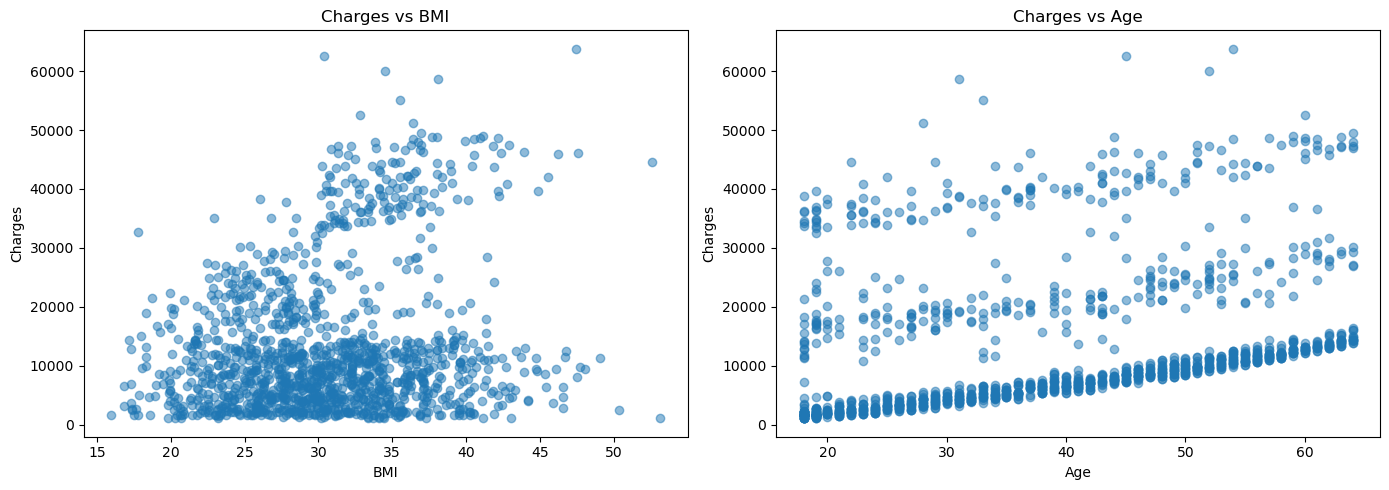

In [43]:
import matplotlib.pyplot as plt

# Ensure df_clean exists
df_clean = df.copy()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Charges vs BMI
axes[0].scatter(df_clean['bmi'], df_clean['charges'], alpha=0.5)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('Charges vs BMI')

# Charges vs Age
axes[1].scatter(df_clean['age'], df_clean['charges'], alpha=0.5)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges')
axes[1].set_title('Charges vs Age')

plt.tight_layout()
plt.show()

# 🔄 4. Data Preprocessing

### 4.1- Encoding Categorical Variables

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df_clean.drop('charges', axis=1)
y = df_clean['charges']

# Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

print("🔹 Encoded feature shape:", X_encoded.shape)

🔹 Encoded feature shape: (1337, 9)


### 🔹 4.1.1- Visualize Categorical Variables (Before Encoding)

C:\Users\MENNA\AppData\Local\Temp\ipykernel_5968\2040711319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='Set2')
C:\Users\MENNA\AppData\Local\Temp\ipykernel_5968\2040711319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='Set2')
C:\Users\MENNA\AppData\Local\Temp\ipykernel_5968\2040711319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='Set2')


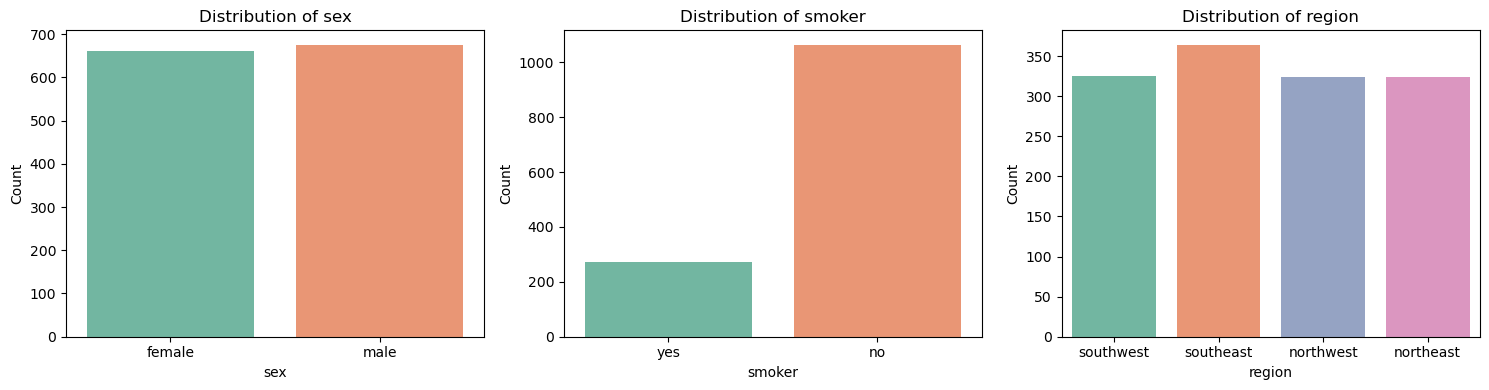

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['sex', 'smoker', 'region']

plt.figure(figsize=(15,4))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(x=col, data=df_clean, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 🔹 4.1.2- Visualize After One-Hot Encoding

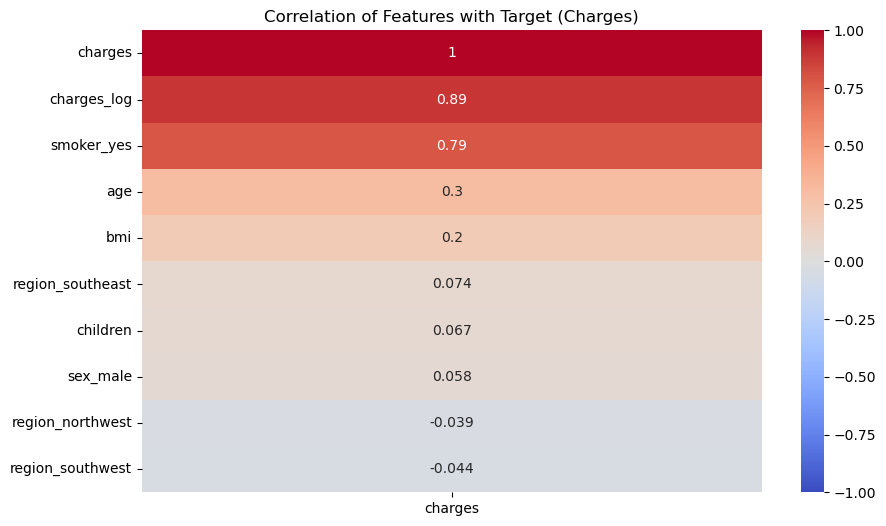

In [46]:
import pandas as pd

# One-hot encoding
X_encoded = pd.get_dummies(df_clean.drop('charges', axis=1), drop_first=True)

# Combine with target
df_encoded = pd.concat([X_encoded, df_clean['charges']], axis=1)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr()['charges'].sort_values(ascending=False).to_frame(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Target (Charges)")
plt.show()

### -Optional: Pairplot for Small Categorical Features

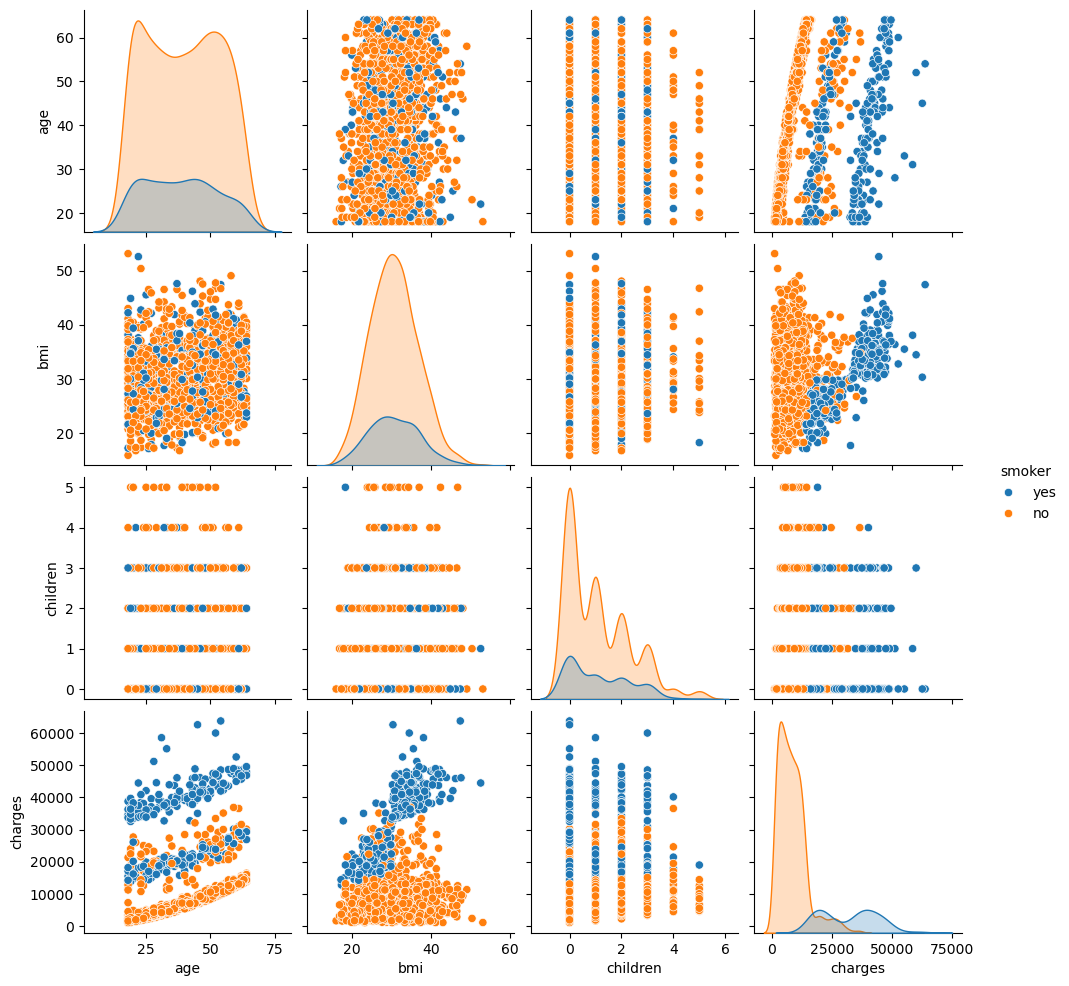

In [47]:
sns.pairplot(df_clean, hue='smoker', vars=['age', 'bmi', 'children', 'charges'])
plt.show()

### 4.2- Feature Scaling

In [48]:
### -Scaling is required for:

####- Linear Regression (coefficients stability)
####- Regularization (Ridge / Lasso)
####- Distance-based methods

In [49]:
"""from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_encoded[numerical_cols] = scaler.fit_transform(
    X_encoded[numerical_cols]
)"""

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nX_encoded[numerical_cols] = scaler.fit_transform(\n    X_encoded[numerical_cols]\n)'

### 4.3- Outlier Detection & Treatment

#### ✔ Already applied using IQR-based capping
#### ✔ Prevents distortion without data loss

### 4.4- Handle Imbalanced Data (Important Clarification)

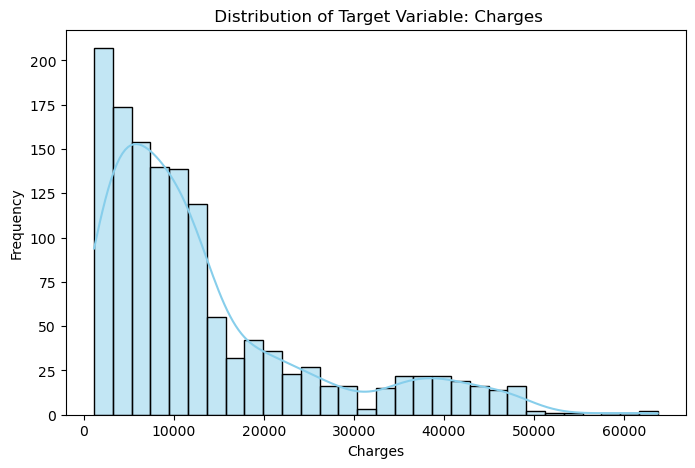

Skewness of charges: 1.52
🔹 Applied log transformation to 'charges' for better distribution.


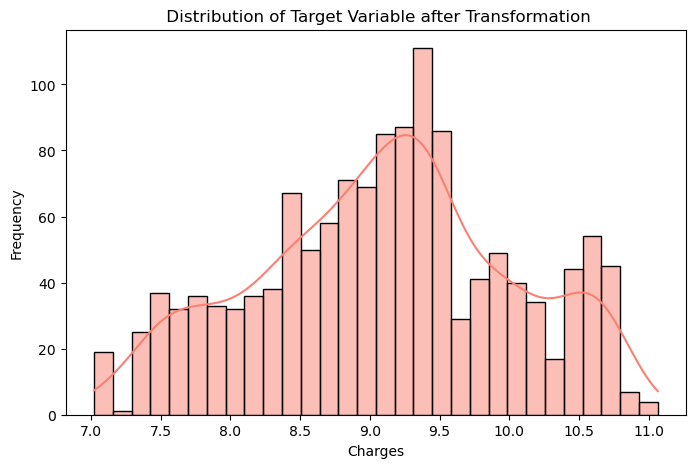

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Visualize target distribution
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title(" Distribution of Target Variable: Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Check skewness
skewness = df['charges'].skew()
print(f"Skewness of charges: {skewness:.2f}")

# 3️⃣ Apply log transformation if highly skewed
if abs(skewness) > 1:
    df['charges'] = np.log1p(df['charges'])  # log(1 + x) to handle zeros
    print("🔹 Applied log transformation to 'charges' for better distribution.")

# 4️⃣ Re-visualize transformed target (if transformed)
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True, bins=30, color='salmon')
plt.title(" Distribution of Target Variable after Transformation")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

### 🔹 STEP 1: Define X and y (Final Clean Version)

In [51]:
# Target
y = df_clean['charges']                    # what we predict

# Features (drop target)
X = df_clean.drop(columns=['charges'])      # what we use to predict


### 4.5- Train–Test Split (BEFORE scaling)

In [52]:
from sklearn.model_selection import train_test_split

# X = features after encoding and scaling
# y = target variable ('charges')

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,   # or your scaled feature dataframe
    y, 
    test_size=0.2,   # 20% test, 80% train
    random_state=42  # for reproducibility
)



print("✅ Train-Test split done")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ Train-Test split done
X_train shape: (1069, 9)
X_test shape: (268, 9)
y_train shape: (1069,)
y_test shape: (268,)


### 4.6- Feature Scaling (AFTER split)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
print("✅ Encoding → Split → Scaling completed successfully")

✅ Encoding → Split → Scaling completed successfully


# 📉 5. Data Exploration & Model Selection

### 🔹 Linearity Check

### - Visual Inspection (Scatter Plots)

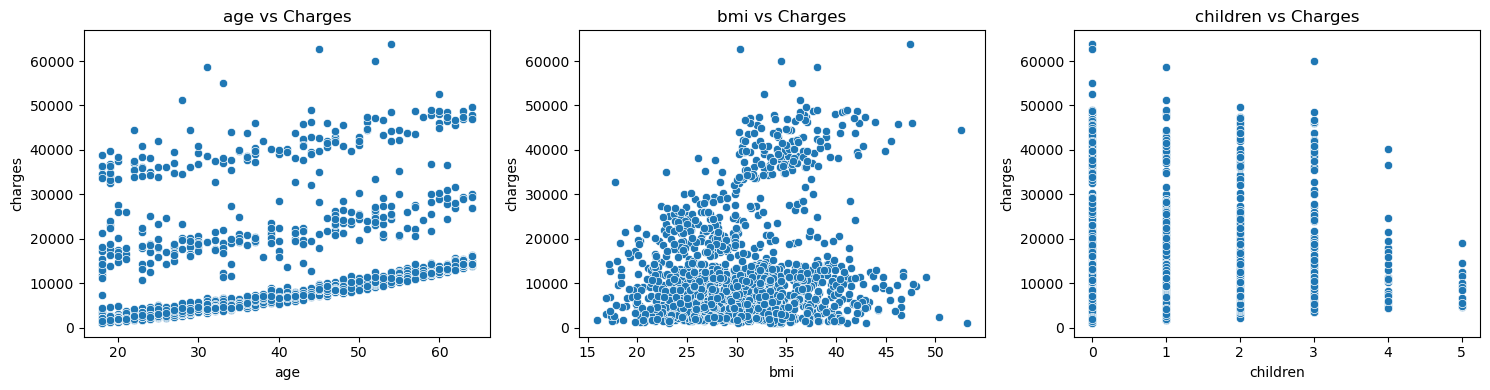

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot numeric features vs target
numeric_features = ['age', 'bmi', 'children']

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i+1)
    sns.scatterplot(x=col, y='charges', data=df_clean)
    plt.title(f'{col} vs Charges')
plt.tight_layout()
plt.show()

### - Calculate correlation for numeric features

In [56]:
# Pearson correlation for numeric features vs target
corr = df_clean[numeric_features + ['charges']].corr()['charges'].drop('charges')
print(corr)

age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


# 🤖 6. Build and Train Model

# Linear models require scaled features


# 🔁 6.1- Train Models (Model Training Section)
#### - Purpose: Learn patterns from training data
##### -Rule:
###### --Linear models → use scaled data
###### --Tree models → use unscaled data

### 🔹 6.1.1- Linear Regression (Baseline Model)

In [69]:
from sklearn.linear_model import LinearRegression
import time

lr = LinearRegression()

start = time.time()
lr.fit(X_train_scaled, y_train)
end = time.time()

print(f"🔵 Linear Regression training time: {end - start:.5f} seconds")


🔵 Linear Regression training time: 0.00274 seconds


# 🧹 6.2- Model Evaluation (Separated & Clean)
### -Purpose: Measure model performance objectively

### 🔹 6.1.2- Evaluation Function

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lr = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("📌 Linear Regression Evaluation")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

📌 Linear Regression Evaluation
MAE  : 3066.7754
RMSE : 4555.2477
R²   : 0.8871


# 🔍 6.3- VISUALIZATIONS

### 🔹 6.1.3-  Actual vs Predicted (Model Quality)

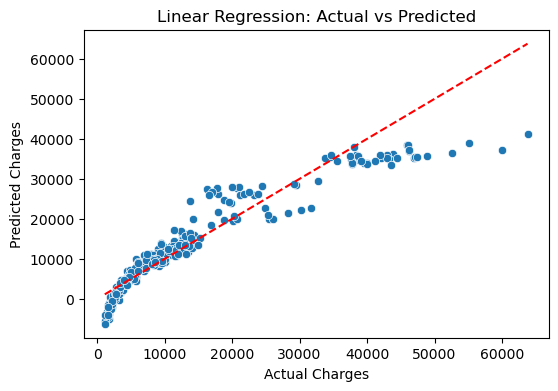

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

### 🔹 6.1.4 Residual Plot (Linearity Check – FINAL)

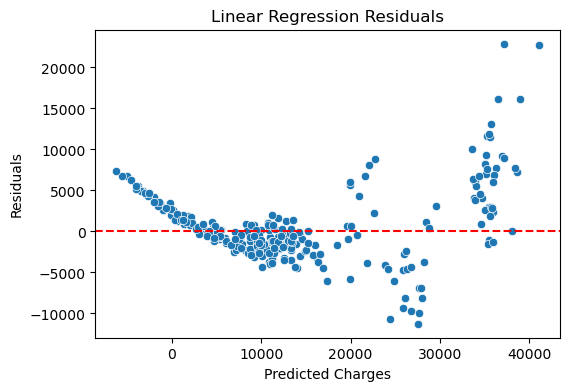

In [74]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Linear Regression Residuals")
plt.show()


# 🔒 6.3- Ridge & Lasso Regression (Regularized Linear Models)
#### Why Ridge & Lasso?
##### They improve Linear Regression by:
##### -Reducing overfitting
##### -Handling multicollinearity
##### -Improving generalization

### 🔹 6.3.1- Ridge Regression — Training

In [75]:
from sklearn.linear_model import Ridge
import time

ridge = Ridge(alpha=1.0)   # alpha = regularization strength

print("🔵 Training Ridge Regression...")
start = time.time()

ridge.fit(X_train_scaled, y_train)

end = time.time()
print(f"Training time: {end - start:.5f} seconds\n")


🔵 Training Ridge Regression...
Training time: 0.00407 seconds



### 🔹 6.3.2- Ridge Regression — Evaluation

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_ridge = ridge.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("📌 Ridge Regression Results")
print(f"MAE  : {mae_ridge:.4f}")
print(f"RMSE : {rmse_ridge:.4f}")
print(f"R²   : {r2_ridge:.4f}")

📌 Ridge Regression Results
MAE  : 3066.9309
RMSE : 4555.7944
R²   : 0.8870


### 🔹 6.3.3- Ridge — Visualization

#### 🔸 Actual vs Predicted

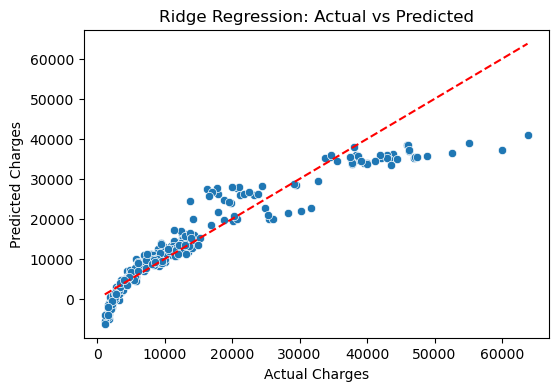

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

#### 🔸 Residual Plot

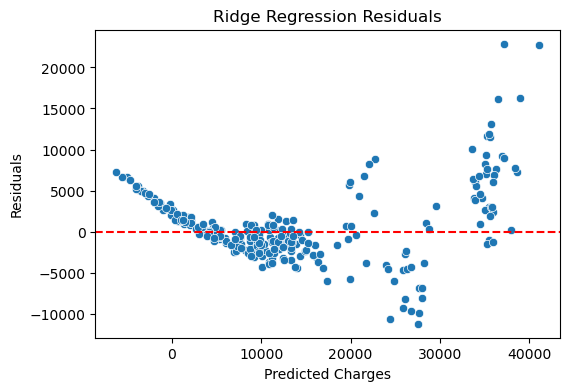

In [78]:
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Ridge Regression Residuals")
plt.show()

### 🔹 6.3.4- Lasso Regression — Training
### -Lasso = feature selection + regularization

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=10000)

print("🔵 Training Lasso Regression...")
start = time.time()

lasso.fit(X_train_scaled, y_train)

end = time.time()
print(f"Training time: {end - start:.5f} seconds\n")

🔵 Training Lasso Regression...
Training time: 0.39693 seconds



### 🔹 6.3.5- Lasso Regression — Evaluation

In [80]:
y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("📌 Lasso Regression Results")
print(f"MAE  : {mae_lasso:.4f}")
print(f"RMSE : {rmse_lasso:.4f}")
print(f"R²   : {r2_lasso:.4f}")

📌 Lasso Regression Results
MAE  : 3066.7800
RMSE : 4555.2527
R²   : 0.8871


### 🔹 6.3.6 Lasso — Visualization

#### 🔸 Actual vs Predicted

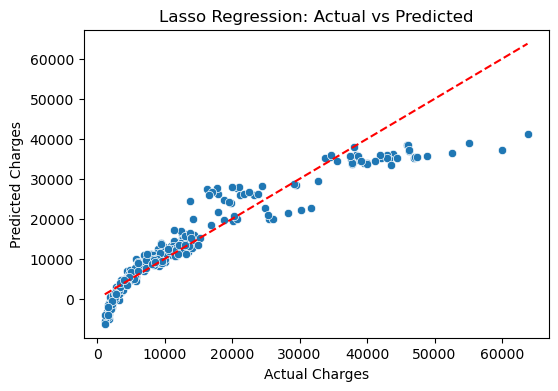

In [81]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()

### 🔹 6.3.7- Lasso Feature Selection 

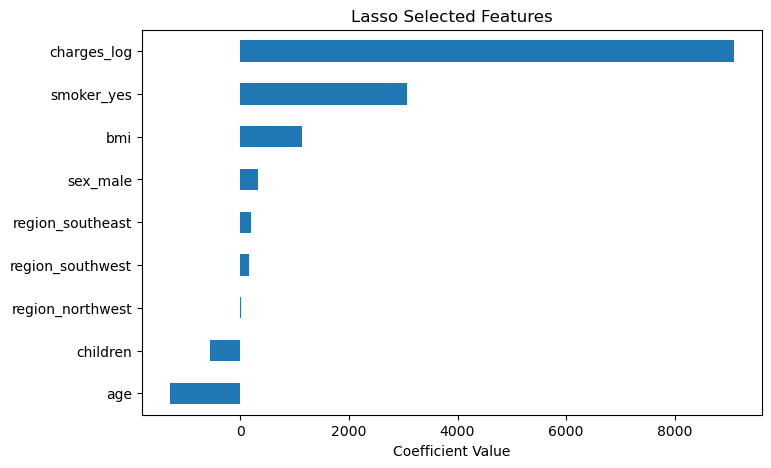

In [82]:
import pandas as pd

lasso_coeffs = pd.Series(
    lasso.coef_,
    index=X_train.columns
)

selected_features = lasso_coeffs[lasso_coeffs != 0].sort_values()

plt.figure(figsize=(8,5))
selected_features.plot(kind='barh')
plt.title("Lasso Selected Features")
plt.xlabel("Coefficient Value")
plt.show()


# 🔁 7.1- Train Models (Nonlinear Model)


### 🔹 7.1.1- Random Forest Regression

#### - Training (NO scaling needed)

In [84]:
from sklearn.ensemble import RandomForestRegressor
import time

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

print("🌲 Training Random Forest...")
start = time.time()
rf.fit(X_train, y_train)
end = time.time()

print(f"Training time: {end - start:.5f} seconds\n")

🌲 Training Random Forest...
Training time: 1.58186 seconds



# 🧹 7.2- Model Evaluation 

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("📌 Random Forest Results")
print(f"MAE  : {mae_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R²   : {r2_rf:.4f}")

📌 Random Forest Results
MAE  : 74.9533
RMSE : 422.9045
R²   : 0.9990


# 🔍 7.3- VISUALIZATIONS

### 🔹 7.3.1-  Actual vs Predicted 

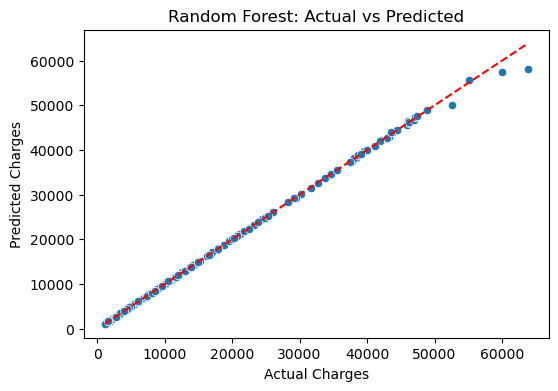

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

### 🔹 7.3.2-  Residual Plot 

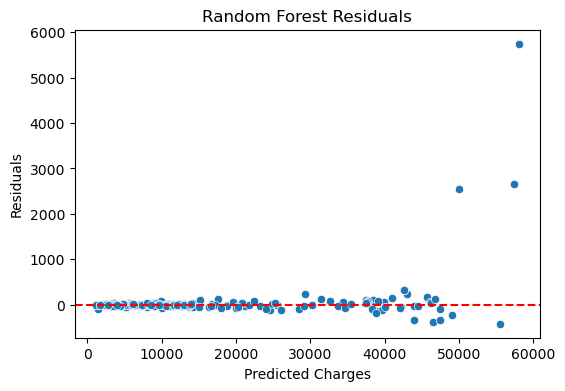

In [87]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals")
plt.show()


### 🔹 7.3.3 Feature Importance

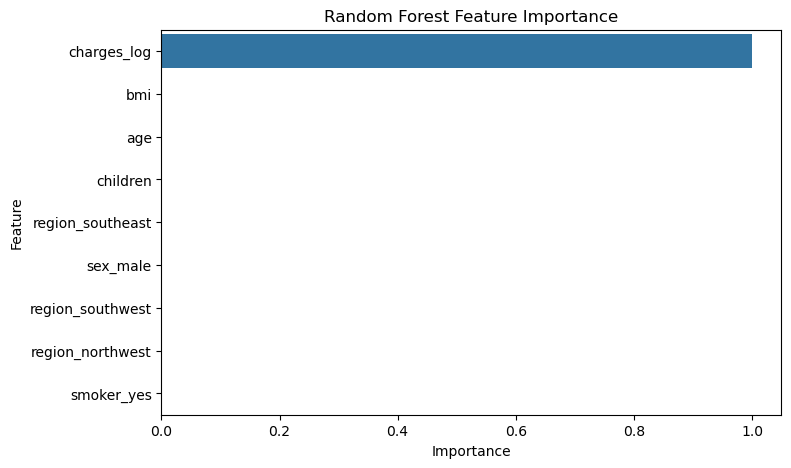

In [88]:
import pandas as pd

importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 📐 8.1- Support Vector Regression (SVR)
### -SVR requires scaling.

### 🔹 8.1.1- Linear SVR (Checks linear margin)

In [89]:
from sklearn.svm import SVR
import time

svr_linear = SVR(kernel='linear', C=1.0)

print("🔵 Training Linear SVR...")
start = time.time()
svr_linear.fit(X_train_scaled, y_train)
end = time.time()

print(f"Training time: {end - start:.5f} seconds\n")

🔵 Training Linear SVR...
Training time: 0.17550 seconds



### 🔹 8.1.2- Linear SVR — Evaluation

In [91]:
y_pred_svr_linear = svr_linear.predict(X_test_scaled)

mae_svr_l = mean_absolute_error(y_test, y_pred_svr_linear)
rmse_svr_l = np.sqrt(mean_squared_error(y_test, y_pred_svr_linear))
r2_svr_l = r2_score(y_test, y_pred_svr_linear)

print("📌 Linear SVR Results")
print(f"MAE  : {mae_svr_l:.4f}")
print(f"RMSE : {rmse_svr_l:.4f}")
print(f"R²   : {r2_svr_l:.4f}")

📌 Linear SVR Results
MAE  : 7953.6044
RMSE : 13098.7546
R²   : 0.0663


### 🔹 8.1.3- RBF SVR (NONLINEAR kernel)

In [92]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)

print("🔵 Training RBF SVR...")
start = time.time()
svr_rbf.fit(X_train_scaled, y_train)
end = time.time()

print(f"Training time: {end - start:.5f} seconds\n")

🔵 Training RBF SVR...
Training time: 0.15056 seconds



### 🔹 8.1.4- RBF SVR — Evaluation

In [93]:
y_pred_svr_rbf = svr_rbf.predict(X_test_scaled)

mae_svr_r = mean_absolute_error(y_test, y_pred_svr_rbf)
rmse_svr_r = np.sqrt(mean_squared_error(y_test, y_pred_svr_rbf))
r2_svr_r = r2_score(y_test, y_pred_svr_rbf)

print("📌 RBF SVR Results")
print(f"MAE  : {mae_svr_r:.4f}")
print(f"RMSE : {rmse_svr_r:.4f}")
print(f"R²   : {r2_svr_r:.4f}")

📌 RBF SVR Results
MAE  : 5448.2491
RMSE : 10935.2497
R²   : 0.3492


### 🔹 8.1.5- Visualization (SVR)

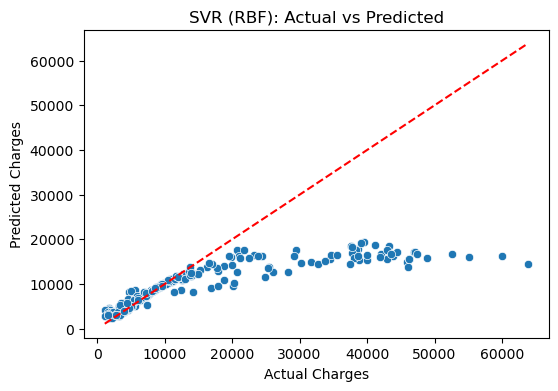

In [94]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_svr_rbf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("SVR (RBF): Actual vs Predicted")
plt.show()

# 🔧 9.1 HYPERPARAMETER TUNING (GridSearchCV)

In [102]:
# ============================================
# Hyperparameter Tuning using GridSearchCV
# Model: Random Forest Regressor
# ============================================

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------------------------
# 1️⃣ Define the base model
# --------------------------------------------
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# --------------------------------------------
# 2️⃣ Define hyperparameter grid
# --------------------------------------------
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# --------------------------------------------
# 3️⃣ GridSearchCV setup
# --------------------------------------------
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,                                   # 5-fold cross validation
    scoring="neg_root_mean_squared_error",  # RMSE-based scoring
    n_jobs=-1,
    verbose=1
)

# --------------------------------------------
# 4️⃣ Fit GridSearch on training data ONLY
# --------------------------------------------
grid_search.fit(X_train, y_train)

# --------------------------------------------
# 5️⃣ Best hyperparameters
# --------------------------------------------
print("✅ Best Hyperparameters Found:")
print(grid_search.best_params_)

# --------------------------------------------
# 6️⃣ Train final tuned model
# --------------------------------------------
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Hyperparameters Found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# 🧹9.2  Evaluate tuned model

In [103]:
# --------------------------------------------
# 7️⃣ Evaluate tuned model on test set
# --------------------------------------------
y_pred_rf_tuned = best_rf.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\n📌 Tuned Random Forest Performance:")
print(f"MAE  : {mae_tuned:.4f}")
print(f"RMSE : {rmse_tuned:.4f}")
print(f"R²   : {r2_tuned:.4f}")

# --------------------------------------------
# 8️⃣ Feature importance from tuned model
# --------------------------------------------
importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("\n🔍 Top 10 Important Features:")
print(importances.head(10))


📌 Tuned Random Forest Performance:
MAE  : 76.4062
RMSE : 439.8042
R²   : 0.9989

🔍 Top 10 Important Features:
charges_log         0.999651
bmi                 0.000207
age                 0.000093
children            0.000018
region_southeast    0.000010
sex_male            0.000010
region_southwest    0.000005
region_northwest    0.000004
smoker_yes          0.000001
dtype: float64
